In [139]:
# Dependencies and Setup
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from datetime import datetime

In [140]:
# Name of the CSV file
file = 'Historical Interest Rate Data/Historical Interest Rate Data - 1990 - 2022.xlsx'

ir_df = pd.read_excel(file, sheet_name ='Sheet1', index_col=0, dtype={'Effective Date':'datetime64[ns]', 'Cash Rate Target': float})

Peak_1 = ir_df
Peak_1 = Peak_1[(Peak_1.index > "1994-07-26") & (Peak_1.index < "1994-12-15")]

Peak_2 = ir_df
Peak_2 = Peak_2[(Peak_2.index> "1999-10-05") & (Peak_2.index < "2000-09-07")]

Peak_3 = ir_df
Peak_3 = Peak_3[(Peak_3.index > "2007-07-03") & (Peak_3.index < "2008-03-06")]

Peak_4 = ir_df
Peak_4 = Peak_4[(Peak_4.index > "2009-09-01") & (Peak_4.index < "2010-06-03")]
#bx = ir_df.plot()

In [141]:
Peak_1_Start = Peak_1[(Peak_1.index == "1994-07-27")]
Peak_1_Start = Peak_1_Start.index[0]
Peak_1_Start

Peak_1_30 = Peak_1.index[0] + timedelta(days=30)
Peak_1_60 = Peak_1.index[0] + timedelta(days=60)
Peak_1_90 = Peak_1.index[0] + timedelta(days=90)
Peak_1_120 = Peak_1.index[0] + timedelta(days=120)
Peak_1_150 = Peak_1.index[0] + timedelta(days=150)
Peak_1_180 = Peak_1.index[0] + timedelta(days=180)

# print(Peak_1_Start)
# print(Peak_1_30)
# print(Peak_1_60)
# print(Peak_1_90)
# print(Peak_1_120)
# print(Peak_1_150)
# print(Peak_1_180)

# Peak_1_30.strftime("%Y/%M/%D, %H:%M:%S")
# Peak_1_60.strftime("%Y/%M/%D, %H:%M:%S")
# Peak_1_90.strftime("%Y/%M/%D, %H:%M:%S")
# Peak_1_120.strftime("%Y/%M/%D, %H:%M:%S")
# Peak_1_150.strftime("%Y/%M/%D, %H:%M:%S")
Peak_1_180.strftime("%Y/%M/%D, %H:%M:%S")

Peak_1 = Peak_1[(Peak_1.index > "1994-07-26") & (Peak_1.index < Peak_1_180)]
Peak_1

,Cash Rate Target
Effective Date,
1994-07-27,4.75
1994-08-17,5.50
1994-09-07,5.50
1994-10-24,6.50
1994-11-02,6.50
1994-12-14,7.50


In [142]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '1991-01-01'
end_date = '2021-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^AXJO', 'yahoo', start_date, end_date)

Stock_Peak_1 = panel_data
Stock_Peak_1 = Stock_Peak_1[(Stock_Peak_1.index > "1994-07-26") & (Stock_Peak_1.index < Peak_1_180)]

Stock_Peak_2 = panel_data
Stock_Peak_2 = Stock_Peak_2[(Stock_Peak_2.index> "1999-10-05") & (Stock_Peak_2.index < "2000-09-07")]

Stock_Peak_3 = panel_data
Stock_Peak_3 = Stock_Peak_3[(Stock_Peak_3.index > "2007-07-03") & (Stock_Peak_3.index < "2008-03-06")]

Stock_Peak_4 = panel_data
Stock_Peak_4 = Stock_Peak_4[(Stock_Peak_4.index > "2009-09-01") & (Stock_Peak_4.index < "2010-06-03")]


In [143]:
Stock_Peak_1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1994-07-27,1982.199951,1982.199951,1982.199951,1982.199951,0.0,1982.199951
1994-07-28,1982.300049,1982.300049,1982.300049,1982.300049,0.0,1982.300049
1994-07-29,2003.500000,2003.500000,2003.500000,2003.500000,0.0,2003.500000
1994-08-01,2025.400024,2025.400024,2025.400024,2025.400024,0.0,2025.400024
1994-08-02,2030.300049,2030.300049,2030.300049,2030.300049,0.0,2030.300049
...,...,...,...,...,...,...
1995-01-16,1829.500000,1829.500000,1829.500000,1829.500000,0.0,1829.500000
1995-01-17,1838.199951,1838.199951,1838.199951,1838.199951,0.0,1838.199951
1995-01-18,1844.099976,1844.099976,1844.099976,1844.099976,0.0,1844.099976


<Figure size 2400x1200 with 0 Axes>

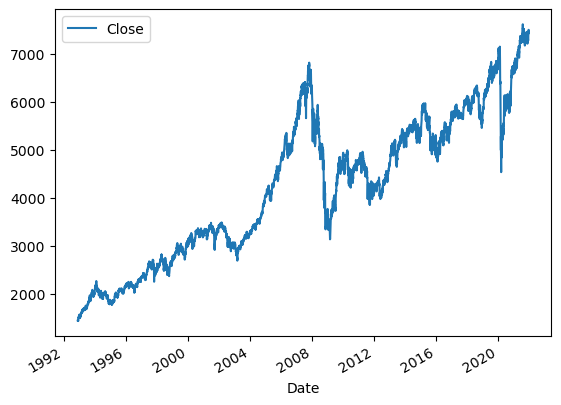

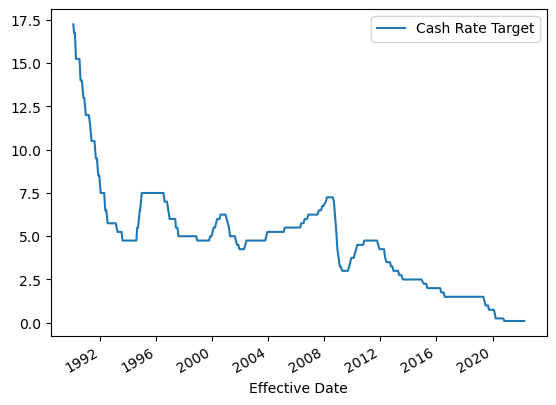

In [144]:
plt.figure(figsize=(16, 8), dpi=150)
ax = panel_data.plot(y='Close')
bx = ir_df.plot(label='Cash')

In [145]:
panel_data.to_csv('panel_data.csv')

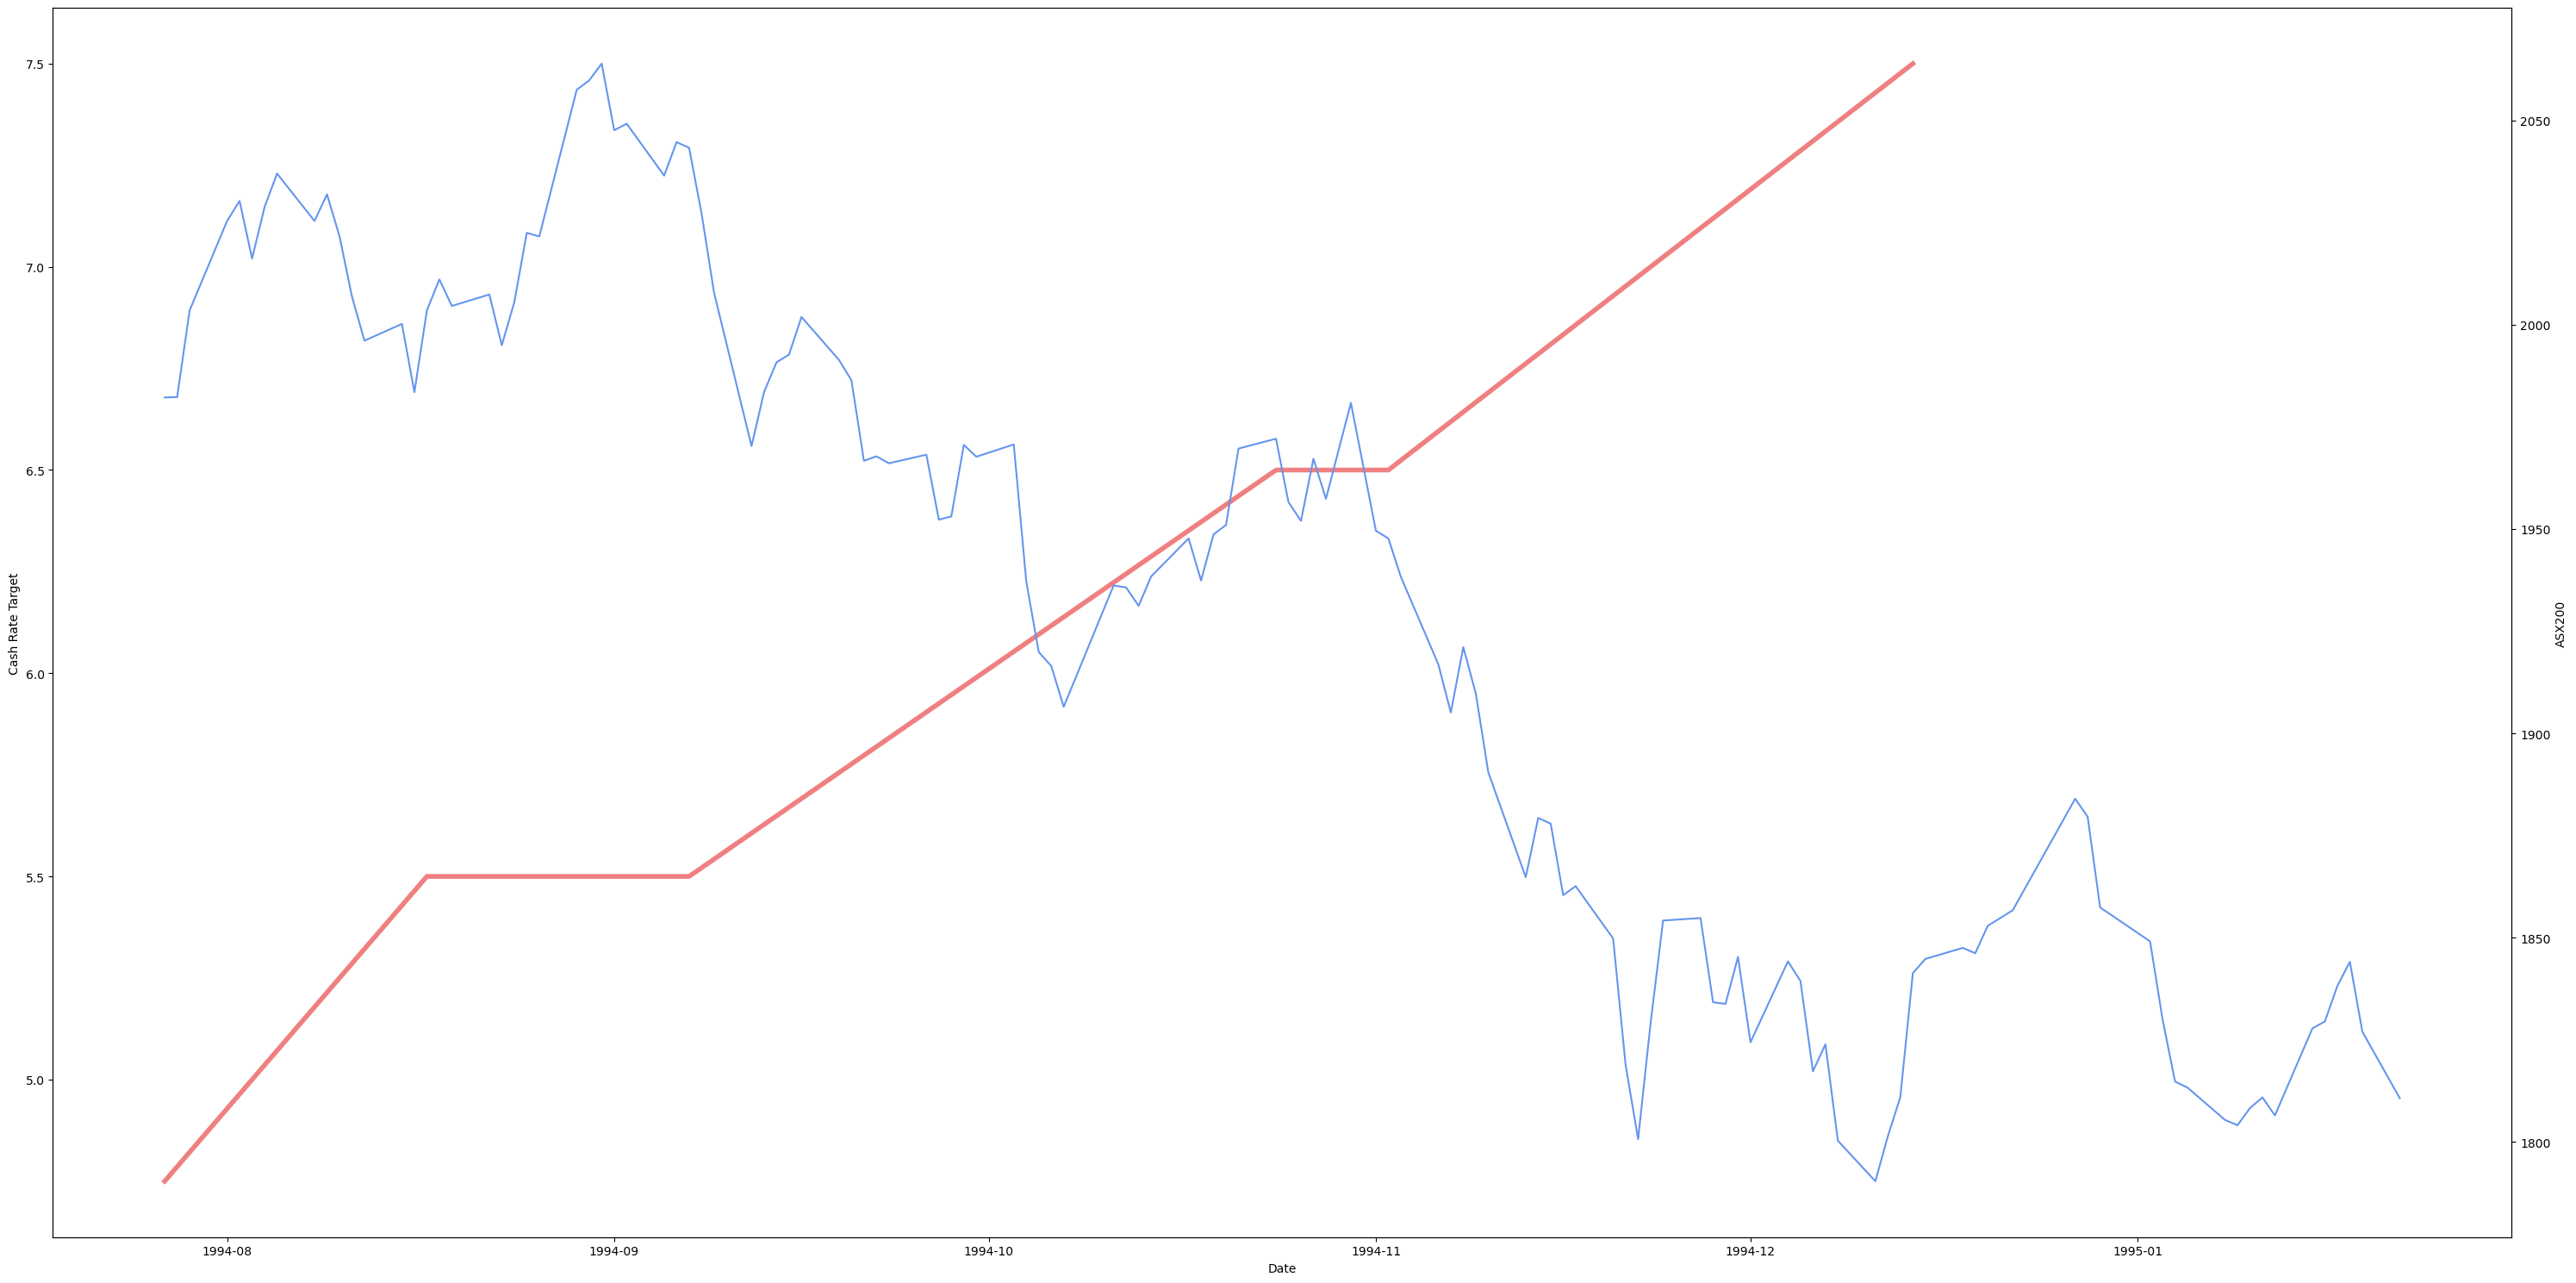

In [147]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(30,15))

ax1.plot(Peak_1, color = 'lightcoral', lw=4)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cash Rate Target')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(Stock_Peak_1['Close'], color ='cornflowerblue')
ax2.set_ylabel('ASX200')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
# ax2.set_ylim([2500, 7500])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("chart4.png")

plt.show()